In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import re
%matplotlib inline

In [2]:
'''Распарсим файл с Access Log серверов NASA в Pandas DataFrame по определенному паттерну; 
выберем только нужные колонки с хостом, датой, урлом и размером запроса'''
host = []
date = []
url = []
size = []

In [3]:
pattern = re.compile(r'^(\S+) - - \[([\w:\/]+\s[+\-]\d{4})\] "(\S+) (\S+)\s*(\S+)?\s*" (\d{3}) (\d+)')

In [4]:
with open('NASA_access_log_Jul95', encoding='ISO-8859-1') as f:
    for line in f:
        modified_line = pattern.match(line)
        if not modified_line:
            continue
        host.append(modified_line.group(1))
        size.append(modified_line.group(7))
        date.append(modified_line.group(2)[:20])
        if (modified_line.group(1) + modified_line.group(4))[-1] == '/':
            url.append((modified_line.group(1) + modified_line.group(4))[:-1])
        else:
            url.append(modified_line.group(1) + modified_line.group(4))

In [5]:
nasa_dic = {'Host': host, 'Date': date, 'URL': url, 'Size': size}
nasa_logs = pd.DataFrame(data=nasa_dic)
nasa_logs

,Host,Date,URL,Size
0,199.72.81.55,01/Jul/1995:00:00:01,199.72.81.55/history/apollo,6245
1,unicomp6.unicomp.net,01/Jul/1995:00:00:06,unicomp6.unicomp.net/shuttle/countdown,3985
2,199.120.110.21,01/Jul/1995:00:00:09,199.120.110.21/shuttle/missions/sts-73/mission...,4085
3,burger.letters.com,01/Jul/1995:00:00:11,burger.letters.com/shuttle/countdown/liftoff.html,0
4,199.120.110.21,01/Jul/1995:00:00:11,199.120.110.21/shuttle/missions/sts-73/sts-73-...,4179
5,burger.letters.com,01/Jul/1995:00:00:12,burger.letters.com/images/NASA-logosmall.gif,0
6,burger.letters.com,01/Jul/1995:00:00:12,burger.letters.com/shuttle/countdown/video/liv...,0
7,205.212.115.106,01/Jul/1995:00:00:12,205.212.115.106/shuttle/countdown/countdown.html,3985
8,d104.aa.net,01/Jul/1995:00:00:13,d104.aa.net/shuttle/countdown,3985
9,129.94.144.152,01/Jul/1995:00:00:13,129.94.144.152,7074


In [6]:
# Уберем значение time zone, т.к. оно везде равно -0400
nasa_logs['Date'] = pd.to_datetime(nasa_logs['Date'], format='%d/%b/%Y:%H:%M:%S')

In [7]:
# Подсчитаем количество обращений к каждому урлу
freq = nasa_logs['URL'].value_counts().to_frame()
freq

,URL
siltb10.orl.mmc.com/images/KSC-logosmall.gif,2549
siltb10.orl.mmc.com/images/launch-logo.gif,2541
siltb10.orl.mmc.com/history/apollo/images/apollo-logo1.gif,2479
currypc.fpl.msstate.edu/htbin/cdt_main.pl,1917
piweba3y.prodigy.com/shuttle/missions/sts-71/sts-71-patch-small.gif,1116
piweba3y.prodigy.com/images/NASA-logosmall.gif,1010
bill.ksc.nasa.gov/htbin/cdt_main.pl,1006
bill.ksc.nasa.gov/images/NASA-logosmall.gif,1003
piweba3y.prodigy.com/images/KSC-logosmall.gif,957
bill.ksc.nasa.gov/shuttle/countdown/images/cdtclock.gif,928


In [8]:
# Найдем топ-15 самых посещаемых урлов
freq.head(15)

,URL
siltb10.orl.mmc.com/images/KSC-logosmall.gif,2549
siltb10.orl.mmc.com/images/launch-logo.gif,2541
siltb10.orl.mmc.com/history/apollo/images/apollo-logo1.gif,2479
currypc.fpl.msstate.edu/htbin/cdt_main.pl,1917
piweba3y.prodigy.com/shuttle/missions/sts-71/sts-71-patch-small.gif,1116
piweba3y.prodigy.com/images/NASA-logosmall.gif,1010
bill.ksc.nasa.gov/htbin/cdt_main.pl,1006
bill.ksc.nasa.gov/images/NASA-logosmall.gif,1003
piweba3y.prodigy.com/images/KSC-logosmall.gif,957
bill.ksc.nasa.gov/shuttle/countdown/images/cdtclock.gif,928


In [9]:
# Найдем число запросов в секунду
groups = nasa_logs.groupby('Date')
requests = groups.aggregate(len)

In [10]:
requests = requests.drop(columns=['URL', 'Size'])
requests = requests.rename(index=str, columns={"Host": "Req_per_sec"})
requests.head()

,Req_per_sec
Date,
1995-07-01 00:00:01,1
1995-07-01 00:00:06,1
1995-07-01 00:00:09,1
1995-07-01 00:00:11,2
1995-07-01 00:00:12,3


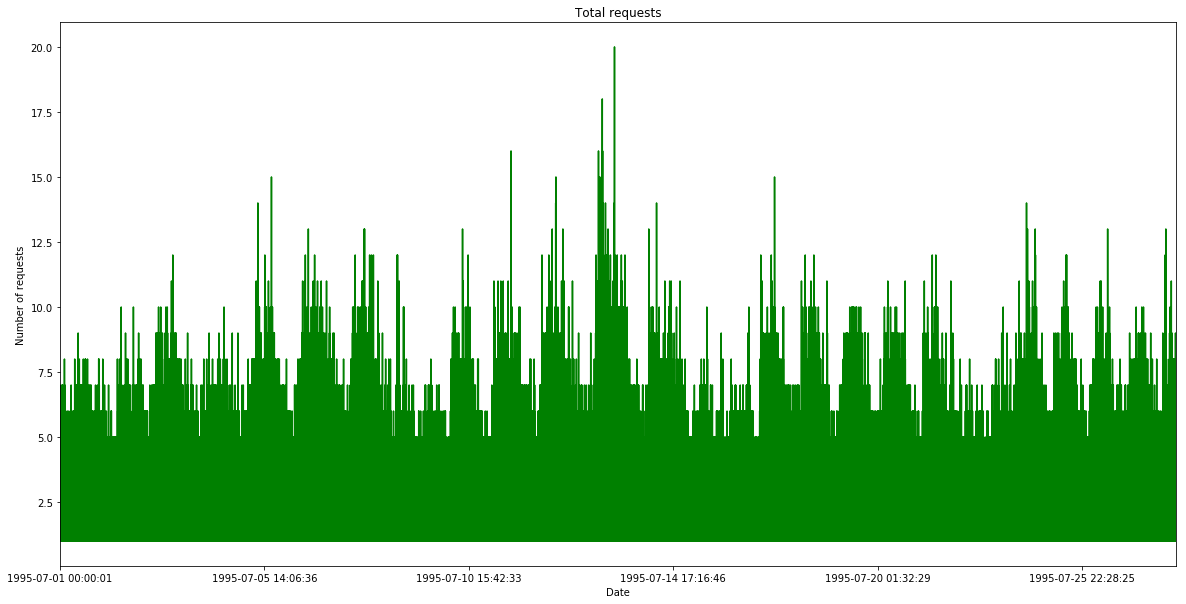

In [11]:
# Нарисуем график числа запросов в секунду
requests.plot(figsize=(20, 10), color='g')
plt.title('Total requests')
plt.ylabel('Number of requests')
plt.legend().remove()
plt.show()

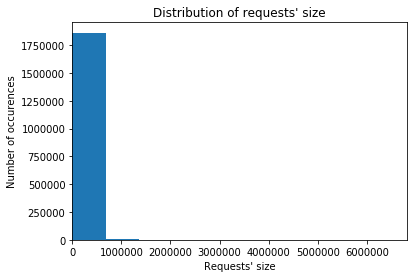

In [12]:
# Построим гистограмму распределения размеров запросов
size = list(map(int, size))
s = np.asarray(size)
plt.hist(s, bins=10)
plt.title("Distribution of requests' size")
plt.ylabel("Number of occurences")
plt.xlabel("Requests' size")
plt.xlim(0, max(s))
plt.show()